Contexto Inicial: Metodología  CRISP-DM.


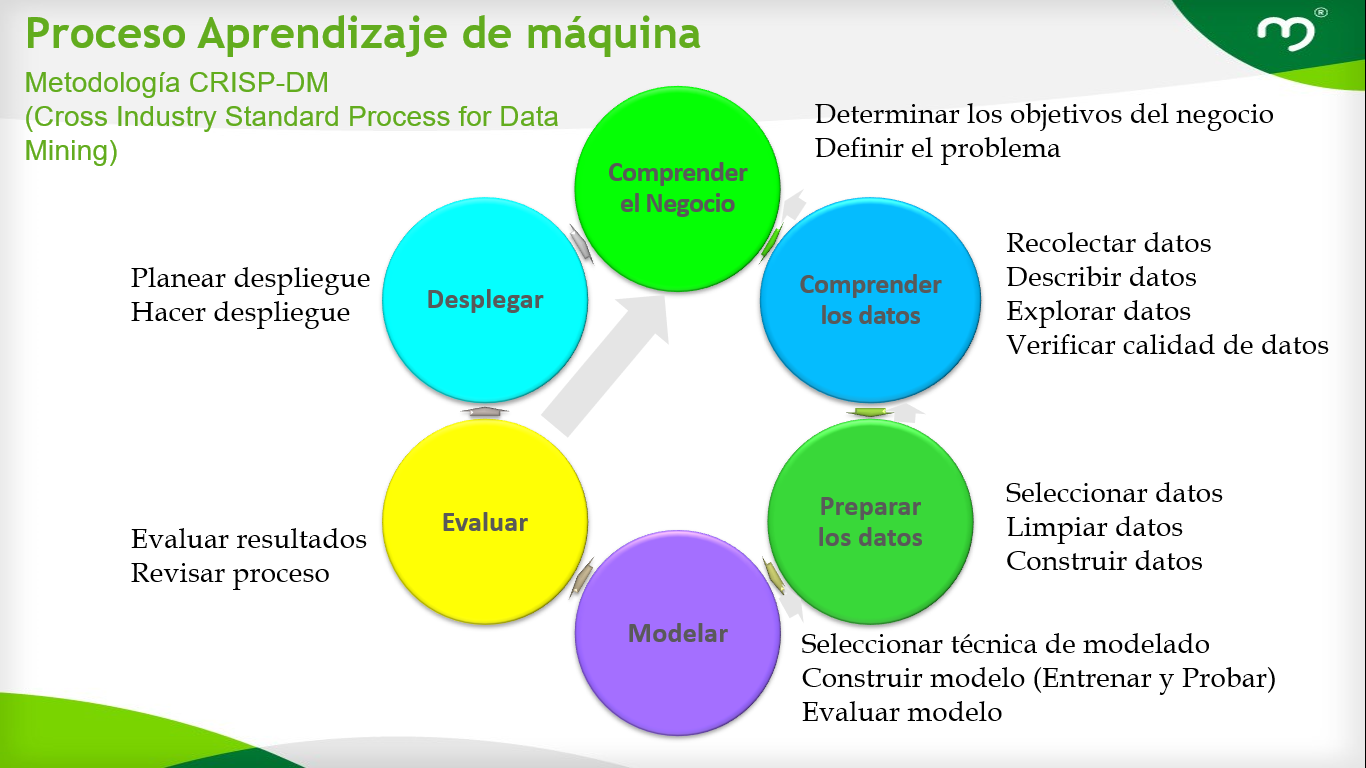

Este notebook tiene dos objetivos:
1. Ilustrar algunos aspectos que son útiles para ejecutar el paso de análisis exploratorio de los datos (Exploratory Data Analysis).
2. Ilustrar aspectos que tienen que ver con la limpieza de datos

<h2>Tabla de Contenido</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#import_data">Análisis Exploratorio de Datos</a></li>
    <li><a href="#import_data">Limpieza de datos</a></li>
    <li><a href="#import_data">Análisis Estadístico Descriptivo</a></li>
    <li><a href="#pattern_visualization">Describir datos categóricos</a></li> 
    <li><a href="#basic_grouping">Conversión de variables categoricas a one hot encoding</a></li>
    <li><a href="#basic_grouping">Agrupar Atributos</a></li>
    <li><a href="#basic_grouping">Analizar patrones de los atributos usando visualización</a></li>
       <li><a href="#anova">Normalización</a></li>
    <li><a href="#anova">Selección de Características</a></li>
    <li><a href="#anova">Personal Component Analysis (PCA)</a></li>
</ol>
    

<h3>El análisis exploratorio de datos se utiliza para conocer los datos y sus relaciones, éste tipo de análisis se debe ejecutar antes de utilizar los algoritmos de Machine Learning y esta muy relacionado con la selección de atributos que se usarán en la creación de modelos, esto porque nos sirve para determinar que atributos tienen relación con la variable a predecir</h3>



Iniciemos importando las librerías que vamos a usar en el ejercicio.

In [1]:
### Librería de cálculo numérico
import numpy as np
### Libreria para manipulación de datasets  
import pandas as pd

Ruta donde se encuentra el dataset


In [2]:
### lugar donde se encuentra el dataset
### path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
### path='E:\00-Digital\17-CienciaDeDatos\01-FrenteFormación\06-Capacitaciones\CapacitacionBasicaEpm\Material\Sesion02'


In [4]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_excel(io.BytesIO(uploaded['DataSetAutos.xlsx']))
####  Dataset is now stored in a Pandas Dataframe
### por favor buscar el archivo DataSetAutos.xlsx donde lo hayas descargado 

Saving DataSetAutos.xlsx to DataSetAutos (4).xlsx


In [5]:
### Cargue de los datos en un dataframe
### df = pd.read_csv(path)

# Objetivo: el propósito de este ejercicio es predecir el valor de un auto.
# Contamos con 201 registros de vehiculos

In [6]:
### Para observar los primeros registros del dataset
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,horsepower-binned,diesel,gas,price
0,3,122,alfa-romero,std,two,convertible,rwd,front,886,8111480000000000,8902780000000000,488,2548,dohc,four,130,mpfi,347,268.0,90,1110,50000,21,27,11190500000000000,Medium,0,1,134950
1,3,122,alfa-romero,std,two,convertible,rwd,front,886,8111480000000000,8902780000000000,488,2548,dohc,four,130,mpfi,347,268.0,90,1110,50000,21,27,11190500000000000,Medium,0,1,165000
2,1,122,alfa-romero,std,two,hatchback,rwd,front,945,8226810000000000,9097220000000000,524,2823,ohcv,six,152,mpfi,268,347.0,90,1540,50000,19,26,1236840000000000,Medium,0,1,165000
3,2,164,audi,std,four,sedan,fwd,front,998,8486300000000000,9194440000000000,543,2337,ohc,four,109,mpfi,319,34.0,100,1020,55000,24,30,9791670000000000,Medium,0,1,139500
4,2,164,audi,std,four,sedan,4wd,front,994,8486300000000000,9222220000000000,543,2824,ohc,five,136,mpfi,319,34.0,80,1150,55000,18,22,13055600000000000,Medium,0,1,174500


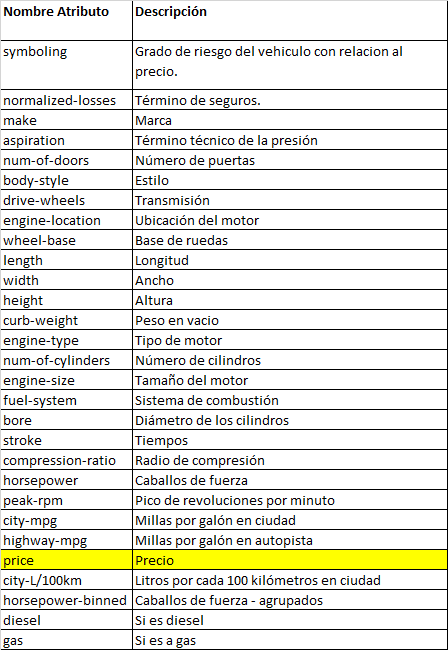

In [7]:
### Mostrar las dimensiones del dataframe
df.shape

(201, 29)

In [8]:
### Describir los tipos de datos de cada una de las columnas del dataframe
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base             int64
length                 int64
width                  int64
height                 int64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                   int64
stroke               float64
compression-ratio      int64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
city-L/100km           int64
horsepower-binned     object
diesel                 int64
gas                    int64
price                  int64
dtype: object

<h2 id="discriptive_statistics">Análisis Descriptivo Estadístico</h2>

<p>La función describe() calcula las estadísticas básicas para todas las variables continuas. Cualquier valor NaN (Not a Number) es saltado automaticamente en esas estadísticas</p>

Esto mostrará:
<ul>
    <li>El conteo de la variable. Cuantos valores tiene la variable</li>
    <li>La media</li>
    <li>La desviación estándar (std)</li> 
    <li>El valor mínimo</li>
    <li>El rango intercuartil IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>El valor máximo</li>
<ul>

In [9]:
### Descripción del dataframe
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas,price
count,201.000000,201.00000,201.000000,2.010000e+02,2.010000e+02,201.000000,201.000000,201.000000,2.010000e+02,197.000000,201.000000,2.010000e+02,2.010000e+02,201.000000,201.000000,2.010000e+02,201.000000,201.000000,201.000000
mean,0.840796,122.00000,987.970149,7.460951e+15,8.268794e+15,537.666667,2555.666667,126.875622,6.626368e+13,271.873096,110.024876,1.037373e+12,5.099871e+13,25.179104,30.686567,7.773224e+15,0.099502,0.900498,132071.293532
std,1.254802,31.99625,60.663656,2.518825e+15,2.692116e+15,24.478222,517.296727,41.546834,4.661887e+14,114.865268,92.165527,1.037360e+13,5.099807e+14,6.423220,6.815150,5.962921e+15,0.300083,0.300083,79470.663419
min,-2.000000,65.00000,866.000000,1.000000e+01,1.000000e+01,478.000000,1488.000000,61.000000,3.500000e+01,28.000000,70.000000,4.800000e+02,4.150000e+04,13.000000,16.000000,5.000000e+01,0.000000,0.000000,51180.000000
25%,0.000000,101.00000,945.000000,7.645360e+15,8.861110e+15,520.000000,2169.000000,98.000000,3.050000e+02,264.000000,86.000000,7.000000e+02,4.800000e+04,19.000000,25.000000,6.184210e+15,0.000000,1.000000,77750.000000
50%,1.000000,122.00000,970.000000,8.265260e+15,9.083330e+15,541.000000,2414.000000,120.000000,3.270000e+02,319.000000,90.000000,9.500000e+02,5.200000e+04,24.000000,30.000000,8.392860e+15,0.000000,1.000000,102950.000000
75%,2.000000,137.00000,1024.000000,8.543970e+15,9.236110e+15,555.000000,2926.000000,141.000000,3.580000e+02,339.000000,94.000000,1.160000e+03,5.500000e+04,30.000000,34.000000,9.791670e+15,0.000000,1.000000,165000.000000
max,3.000000,256.00000,1209.000000,9.735700e+15,9.958330e+15,598.000000,4066.000000,326.000000,3.329750e+15,417.000000,941.000000,1.042560e+14,5.125370e+15,49.000000,54.000000,6.714290e+16,1.000000,1.000000,454000.000000


In [10]:
### Encontrar columnas que tienen registros vacios
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
price                0
dtype: int64

In [11]:
### Descripción del atributo stroke
df['stroke'].describe()

count    197.000000
mean     271.873096
std      114.865268
min       28.000000
25%      264.000000
50%      319.000000
75%      339.000000
max      417.000000
Name: stroke, dtype: float64

In [12]:
### Copiar el dataframe df en dfTemporal para hacer la limpieza de datos en el dataframe dfTemporal.
dfTemporal = df

In [13]:
### Actualizar en el atributos stroke al valor 50 los registros que tienen en el atributo un valor inferior a 28
dfTemporal['stroke'][dfTemporal['stroke']<28] = 50

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
### Asignar la media a los atributos que tienen valor nulo
dfTemporal['stroke'].fillna(dfTemporal['stroke'].mean(),inplace=True)

In [15]:
### Conocer los valores unicos de un atributo
df.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [16]:
%%capture
### Instalar seaborn que es un paquete usado para visualización
! pip install seaborn

In [17]:
### Importar matplotlib
import matplotlib.pyplot as plt
### Importar Seaborn
import seaborn as sns
### Para efectuar plot en un notebook
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<h3>Value Counts. Conteo por cada categoría, Esto aplica para variables categóricas</h3>

In [18]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Podemos convertir la serie anterior en un dataframe :

In [19]:
### Valores que tiene la variable drive-wheels desplegados como un dataframe
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


<h2 id="basic_grouping">Agrupamiento (Groupby)</h2>

<p>El método GroupBy agrupa datos por diferentes categorías.</p>

<p>Por ejemplo vamos a agrupar la variable "drive-wheels" y el "price".</p>

In [20]:
df_group_one = df[['drive-wheels','price']]
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=True).mean()
df_group_one

,price
drive-wheels,
4wd,102410.000000
fwd,92447.796610
rwd,197576.133333


<p>Ahora vamos a agrupar por las variables 'drive-wheels', 'body-style' and 'price'.</p>

In [21]:
df_group_two = df[['drive-wheels','body-style','price']]
df_group_two = df_group_two.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_group_two

,drive-wheels,body-style,price
0,4wd,hatchback,76030.000000
1,4wd,sedan,126473.333333
2,4wd,wagon,90957.500000
3,fwd,convertible,115950.000000
4,fwd,hardtop,82490.000000
5,fwd,hatchback,83963.877551
6,fwd,sedan,98118.000000
7,fwd,wagon,99973.333333
8,rwd,convertible,239496.000000
9,rwd,hardtop,242027.142857


<p>Estos datos agrupados son más faciles de observar utilizando una tabla privot, como en excel.</p>


In [22]:
grouped_pivot = df_group_two.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                 ...                              
body-style   convertible        hardtop  ...          sedan          wagon
drive-wheels                             ...                              
4wd                  NaN            NaN  ...  126473.333333   90957.500000
fwd             115950.0   82490.000000  ...   98118.000000   99973.333333
rwd             239496.0  242027.142857  ...  217118.333333  169942.222222

[3 rows x 5 columns]

<p>En ocasiones, no tenemos datos para algunas de las celdas, podemos llenar esos valores con ceros, aunque es posible completarlos con otro valor, lo más conveniente es efectuar corrección sobre los datos desde la fuente.</p>

In [23]:
#fill missing values with 0
grouped_pivot = grouped_pivot.fillna(0) 
grouped_pivot

price                 ...                              
body-style   convertible        hardtop  ...          sedan          wagon
drive-wheels                             ...                              
4wd                  0.0       0.000000  ...  126473.333333   90957.500000
fwd             115950.0   82490.000000  ...   98118.000000   99973.333333
rwd             239496.0  242027.142857  ...  217118.333333  169942.222222

[3 rows x 5 columns]

In [24]:
### Importar la libreria matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

Vamos a usar un mapa de calor para visualizar la relación entre las variables "body-style" y el "price"

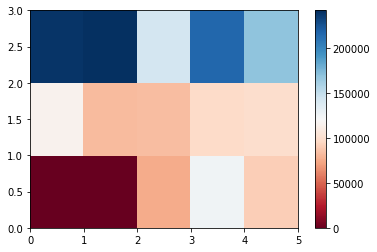

In [25]:
### Mapa de calor sin etiquetas
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

<p>Mejoremos el etiquetado para observar la información de manera mas clara:</p>

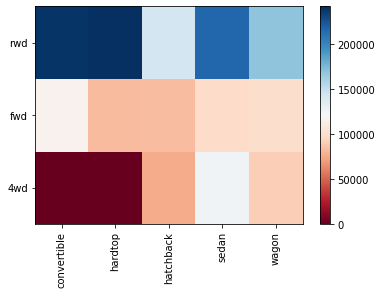

In [26]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<p>La visualización se apoya también en los gráficos BoxPlot (Diagrama de caja y bigotes), ScatterPlot (Diagrama de dispersión) y RegPlot (Diagrama de regresión). Estos gráficos fueron socializados por compañeros de la Comunidad de Ciencia de Datos en sesiones previas, por lo que no los trataremos en esta sesión</p>

<p>La visualización es muy importante en ciencia de datos y los paquetes de Python proporcionan mucha versatilidad.</p>

<p>El análisis exploratorio nos debe ayudar a responder la pregunta: ¿Cuales son las principales características o atributos que tienen mayor impacto sobre la variable objetivo?".</p>

<p>Para responder esta pregunta de manera más precisa, analizamos la correlacion de esas variables con la variable objetivo, con el fin de determinar como la variable objetivo es dependiente del resto de las variables que nos entregaron</p>

<h2 id="correlation_causation">5. Correlación y Causación</h2>

<p><b>Correlación</b>: medida del grado de interdependencia entre variables.</p>

<p><b>Causación</b>: la relación causa y efecto entre dos variables.</p>

<p></p>

<p3>Correlación de Pearson</p>
<p>Mide la dependencia lineal entre dos variables "X" y "Y".</p>
<p>El resultado es el coeficiente de Person, el cual es un valor entre -1 and 1 inclusive, donde:</p>
<ul>
    <li><b>1</b>: Indica correlación lineal positiva.</li>
    <li><b>0</b>: Indica que no hay correlación, es decir, muy probablemente las dos variables no se afectan.</li>
    <li><b>-1</b>: Indica correlación lineal negativa</li>
</ul>

<p>
La correlación de Pearson es el método predeterminado de la función "corr". Como antes, podemos calcular la correlación de Pearson de las variables 'int64' o 'float64'.</p>

In [27]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas,price
symboling,1.000000,4.662638e-01,-0.535987,-0.024423,-0.062344,-0.550160,-0.233118,-0.110581,2.458094e-01,-3.198692e-01,0.004877,1.275118e-02,1.275118e-02,-0.035527,0.036233,-0.048799,-0.196735,0.196735,-0.082391
normalized-losses,0.466264,1.000000e+00,-0.056661,-0.159353,-0.171738,-0.373737,0.099404,0.112360,1.250083e-01,-1.431007e-01,-0.015812,7.827119e-12,2.245759e-12,-0.225016,-0.181877,-0.105655,-0.101546,0.101546,0.133999
wheel-base,-0.535987,-5.666124e-02,1.000000,0.052680,-0.170932,0.590742,0.782097,0.572027,-8.234720e-02,4.674394e-02,0.072439,-4.468135e-02,-4.468135e-02,-0.470606,-0.543304,-0.041078,0.307237,-0.307237,0.584642
length,-0.024423,-1.593531e-01,0.052680,1.000000,0.259677,-0.019050,0.135732,0.038754,3.743899e-02,-1.574849e-01,0.010939,4.580105e-02,4.580105e-02,-0.194085,-0.164204,-0.201313,-0.037480,0.037480,0.088528
width,-0.062344,-1.717381e-01,-0.170932,0.259677,1.000000,-0.086156,-0.088383,0.089267,-4.387614e-01,-8.316724e-02,-0.034274,-1.362883e-01,-1.362883e-01,0.032595,0.057843,0.073780,-0.158260,0.158260,0.009606
height,-0.550160,-3.737370e-01,0.590742,-0.019050,-0.086156,1.000000,0.307581,0.074694,-2.431581e-01,-2.376051e-02,0.100514,-3.763597e-02,-3.763597e-02,-0.049800,-0.104812,0.035018,0.281578,-0.281578,0.135486
curb-weight,-0.233118,9.940425e-02,0.782097,0.135732,-0.088383,0.307581,1.000000,0.849072,-3.988022e-02,-1.883752e-02,0.016603,-7.026519e-03,-7.026519e-03,-0.749543,-0.794889,-0.026425,0.221046,-0.221046,0.834415
engine-size,-0.110581,1.123600e-01,0.572027,0.038754,0.089267,0.074694,0.849072,1.000000,-1.869589e-01,-2.907665e-02,-0.034654,1.239580e-02,1.239580e-02,-0.650546,-0.679571,0.051069,0.070779,-0.070779,0.872335
bore,0.245809,1.250083e-01,-0.082347,0.037439,-0.438761,-0.243158,-0.039880,-0.186959,1.000000e+00,3.125784e-15,-0.024837,-1.428517e-02,-1.428517e-02,-0.187460,-0.161115,0.062152,-0.047367,0.047367,-0.003364
stroke,-0.319869,-1.431007e-01,0.046744,-0.157485,-0.083167,-0.023761,-0.018838,-0.029077,3.125784e-15,1.000000e+00,0.020938,-2.058207e-01,-2.058207e-01,0.116128,0.083347,-0.018887,0.000518,-0.000518,-0.111189


Algunas veces deseamos conocer la significancia de la correlación estimada.

<b>P-value</b>: 
<p>¿Cuál es este valor P? El valor P es el valor de probabilidad de que la correlación entre estas dos variables sea estadísticamente significativa. Normalmente, elegimos un nivel de significancia de 0.05, lo que significa que tenemos un 95% de confianza en que la correlación entre las variables es significativa.</p>

By convention, when the
<ul>
    <li>p-value es $<$ 0.001: decimos que hay una evidencia fuerte de que la correlación es significativa.</li>
    <li>the p-value is $<$ 0.05: hay evidencia moderada de que la correlación es significativa.</li>
    <li>the p-value is $<$ 0.1: hay evidencia débil de que la correlación sea sinificativa.</li>
    <li>the p-value is $>$ 0.1: no hay evidencia de que la correlación sea significativa.</li>
</ul>

In [28]:
### Importar paquete stats
from scipy import stats

<h3>Analisis de correlación entre engine-size y Price</h3>

In [29]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("El coeficiente de correlacion de Pearson es ", pearson_coef, " con un p-value de P = ", p_value)  

El coeficiente de correlacion de Pearson es  0.8723351674455186  con un p-value de P =  9.265491622197335e-64


<h5>Conclusion:</h5>

<p>Puesto el p-value is $<$ 0.001, la correlación entre  engine-size y price es estadísticamente significativa, y la relación lineal es muy fuerte (~0.872, close to 1)</p>

Normalización (estandarización): 
consiste en transformar los datos de forma que todos los predictores estén aproximadamente en la misma escala. Hay dos formas de lograrlo:

Normalización Z-score: dividir cada predictor entre su desviación típica después de haber sido centrado, de esta forma, los datos pasan a tener una distribución normal.

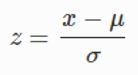

Estandarización max-min: transformar los datos para que queden dentro del rango [0, 1]. 


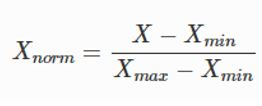

In [30]:
### Normalizacion con sklearn
from sklearn.preprocessing import normalize
dfNormalize = normalize(df[["horsepower"]], axis=0)
print(dfNormalize)

[[7.52847344e-12]
 [7.52847344e-12]
 [1.04449091e-11]
 [6.91805668e-12]
 [7.79976978e-12]
 [7.46064936e-12]
 [7.46064936e-12]
 [7.46064936e-12]
 [9.49537191e-12]
 [6.85023259e-12]
 [6.85023259e-12]
 [8.20671429e-12]
 [8.20671429e-12]
 [8.20671429e-12]
 [1.23439835e-11]
 [1.23439835e-11]
 [1.23439835e-11]
 [3.25555608e-12]
 [4.74768595e-12]
 [4.74768595e-12]
 [4.61203778e-12]
 [4.61203778e-12]
 [6.91805668e-12]
 [4.61203778e-12]
 [4.61203778e-12]
 [4.61203778e-12]
 [6.91805668e-12]
 [5.96851949e-12]
 [9.83449233e-12]
 [3.93379693e-12]
 [5.15463046e-12]
 [4.06944510e-12]
 [5.15463046e-12]
 [5.15463046e-12]
 [5.15463046e-12]
 [5.15463046e-12]
 [5.83287132e-12]
 [5.83287132e-12]
 [5.83287132e-12]
 [5.83287132e-12]
 [6.85023259e-12]
 [6.78240851e-12]
 [5.29027863e-12]
 [6.10416766e-12]
 [1.19370390e-11]
 [1.19370390e-11]
 [1.77699103e-11]
 [4.61203778e-12]
 [4.61203778e-12]
 [4.61203778e-12]
 [4.61203778e-12]
 [4.61203778e-12]
 [6.85023259e-12]
 [6.85023259e-12]
 [6.85023259e-12]
 [9.156251

In [31]:
### Estandarizacion con sklearn
from sklearn.preprocessing import scale
dfScale = scale(df[["horsepower"]], axis=0)
print(dfScale)


[[-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025094]
 [-0.10025

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [34]:
dfTemporal.head(5)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,horsepower-binned_High,horsepower-binned_Low,horsepower-binned_Medium
0,3,122,886,8111480000000000,8902780000000000,488,2548,130,347,268.0,90,1110,50000,21,27,11190500000000000,0,1,134950,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,3,122,886,8111480000000000,8902780000000000,488,2548,130,347,268.0,90,1110,50000,21,27,11190500000000000,0,1,165000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,122,945,8226810000000000,9097220000000000,524,2823,152,268,347.0,90,1540,50000,19,26,1236840000000000,0,1,165000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,2,164,998,8486300000000000,9194440000000000,543,2337,109,319,34.0,100,1020,55000,24,30,9791670000000000,0,1,139500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,2,164,994,8486300000000000,9222220000000000,543,2824,136,319,34.0,80,1150,55000,18,22,13055600000000000,0,1,174500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [35]:
dfTemporal = pd.get_dummies(dfTemporal)

In [36]:
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,horsepower-binned,diesel,gas,price
0,3,122,alfa-romero,std,two,convertible,rwd,front,886,8111480000000000,8902780000000000,488,2548,dohc,four,130,mpfi,347,268.0,90,1110,50000,21,27,11190500000000000,Medium,0,1,134950
1,3,122,alfa-romero,std,two,convertible,rwd,front,886,8111480000000000,8902780000000000,488,2548,dohc,four,130,mpfi,347,268.0,90,1110,50000,21,27,11190500000000000,Medium,0,1,165000
2,1,122,alfa-romero,std,two,hatchback,rwd,front,945,8226810000000000,9097220000000000,524,2823,ohcv,six,152,mpfi,268,347.0,90,1540,50000,19,26,1236840000000000,Medium,0,1,165000
3,2,164,audi,std,four,sedan,fwd,front,998,8486300000000000,9194440000000000,543,2337,ohc,four,109,mpfi,319,34.0,100,1020,55000,24,30,9791670000000000,Medium,0,1,139500
4,2,164,audi,std,four,sedan,4wd,front,994,8486300000000000,9222220000000000,543,2824,ohc,five,136,mpfi,319,34.0,80,1150,55000,18,22,13055600000000000,Medium,0,1,174500


In [37]:
### Borra los registros que tienen columnas en valor nulo.
#### any : if any NA values are present, drop that label
dfTemporal.dropna(axis=0,how='any',inplace=True)

Fuente de información:

Este notebook fue elaborado tomando como base un ejercicio de "Data Analysis with Python" de www.coursera.com 

FIN 20200917 - 21:37:00